# **Comparison of Pandas, Polars, and Pandas 2.0**

## **1. Introduction**
When working with large datasets, performance and efficiency play a crucial role. While **Pandas** has been the go-to library for data analysis in Python, newer alternatives like **Polars** have emerged to address its performance limitations. Additionally, **Pandas 2.0** introduces some key optimizations over its predecessor.

In this notebook, we compare **Pandas, Polars, and Pandas 2.0** across various operations such as:
- **Reading speed**
- **Sorting speed**
- **Grouping operations**
- **Data manipulation**
- **Memory usage**

---

## **2. Overview of Pandas, Polars, and Pandas 2.0**

### **Pandas**
- **Description**: Pandas is a widely used Python library for data manipulation and analysis. It provides flexible data structures like `DataFrame` and `Series`.
- **Pros**:
  - Extensive ecosystem and community support
  - Easy-to-use API
  - Well-integrated with NumPy and SciPy
- **Cons**:
  - Single-threaded (slower for large datasets)
  - High memory consumption

### **Polars**
- **Description**: Polars is a high-performance DataFrame library designed for parallel processing and lazy evaluation.
- **Pros**:
  - Faster due to multi-threading and **Rust-based** backend
  - Low memory usage with lazy evaluation
  - Efficient handling of large datasets
- **Cons**:
  - Smaller community support compared to Pandas
  - Some Pandas functionalities are missing

### **Pandas 2.0**
- **Description**: Pandas 2.0 introduces support for **PyArrow backend**, enabling faster operations with reduced memory usage.
- **Pros**:
  - **Arrow-based memory format** improves speed and efficiency
  - Backward compatibility with Pandas 1.x
  - Better handling of larger-than-memory datasets
- **Cons**:
  - Still single-threaded for most operations

---

## **3. Dataset for Benchmarking**
To compare the performance of these libraries, we will use a **synthetic dataset** with **10 million rows**, containing:
- `ID`: Unique identifier
- `Category`: Random categorical values (A, B, C, D, E)
- `Value`: Random floating-point numbers
- `Date`: Random timestamps

Let's generate and save this dataset as a CSV file:

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate data
num_rows = 10_000_000
dates = [datetime(2020, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)]
data = {
    "ID": range(1, num_rows + 1),
    "Category": np.random.choice(["A", "B", "C", "D", "E"], num_rows),
    "Value": np.random.rand(num_rows) * 1000,
    "Date": dates,
}

# Save dataset as CSV
df = pd.DataFrame(data)
df.to_csv("dataset.csv", index=False)

This dataset is now stored as `dataset.csv` and will be used for benchmarking.

---

## **4. Benchmarking Metrics**

### **4.1. Reading Speed**
We measure the time taken to load the dataset into a DataFrame using Pandas and Polars:

In [3]:
import polars as pl
import time

# Pandas Reading Time
start_time = time.time()
pd_df = pd.read_csv("dataset.csv")
pandas_read_time = time.time() - start_time
print(f"Pandas Read Time: {pandas_read_time:.4f} seconds")

# Polars Reading Time
start_time = time.time()
pl_df = pl.read_csv("dataset.csv")
polars_read_time = time.time() - start_time
print(f"Polars Read Time: {polars_read_time:.4f} seconds")

Pandas Read Time: 2.8538 seconds
Polars Read Time: 0.3643 seconds


### **4.2. Sorting Speed**
Sorting the dataset by `Value`:

In [4]:
# Pandas Sorting Time
start_time = time.time()
pd_df_sorted = pd_df.sort_values(by="Value")
pandas_sort_time = time.time() - start_time
print(f"Pandas Sort Time: {pandas_sort_time:.4f} seconds")

# Polars Sorting Time
start_time = time.time()
pl_df_sorted = pl_df.sort("Value")
polars_sort_time = time.time() - start_time
print(f"Polars Sort Time: {polars_sort_time:.4f} seconds")

Pandas Sort Time: 1.5792 seconds
Polars Sort Time: 0.7911 seconds


### **4.3. Grouping Operations**
Grouping data based on `Category` and summing `Value`:

In [6]:
# Pandas Grouping Time
start_time = time.time()
pd_grouped = pd_df.groupby("Category")["Value"].sum()
pandas_group_time = time.time() - start_time
print(f"Pandas Group Time: {pandas_group_time:.4f} seconds")

# Polars Grouping Time
start_time = time.time()
pl_grouped = pl_df.group_by("Category").agg(pl.col("Value").sum())
polars_group_time = time.time() - start_time
print(f"Polars Group Time: {polars_group_time:.4f} seconds")

Pandas Group Time: 0.2726 seconds
Polars Group Time: 0.3458 seconds


### **4.4. Data Manipulation**
Adding a new column `New_Value = Value * 1.1`:

In [7]:
# Pandas Data Manipulation Time
start_time = time.time()
pd_df["New_Value"] = pd_df["Value"] * 1.1
pandas_manipulation_time = time.time() - start_time
print(f"Pandas Manipulation Time: {pandas_manipulation_time:.4f} seconds")

# Polars Data Manipulation Time
start_time = time.time()
pl_df = pl_df.with_columns((pl.col("Value") * 1.1).alias("New_Value"))
polars_manipulation_time = time.time() - start_time
print(f"Polars Manipulation Time: {polars_manipulation_time:.4f} seconds")

Pandas Manipulation Time: 0.0275 seconds
Polars Manipulation Time: 0.0222 seconds


## **5. Performance Results**
Let's visualize the comparison using a bar chart:

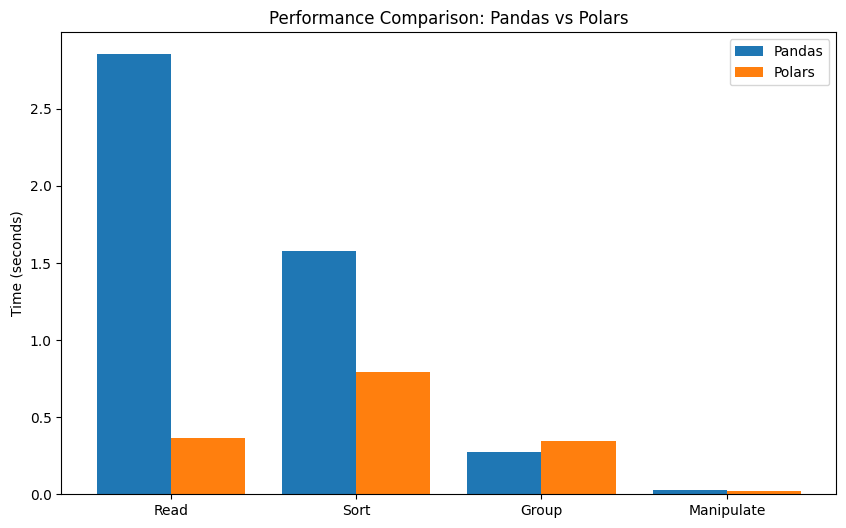

In [13]:
import matplotlib.pyplot as plt

operations = ["Read", "Sort", "Group", "Manipulate"]
pandas_times = [pandas_read_time, pandas_sort_time, pandas_group_time, pandas_manipulation_time]
polars_times = [polars_read_time, polars_sort_time, polars_group_time, polars_manipulation_time]

x = np.arange(len(operations))
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, pandas_times, 0.4, label="Pandas")
plt.bar(x + 0.2, polars_times, 0.4, label="Polars")
plt.xticks(x, operations)
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison: Pandas vs Polars")
plt.legend()
plt.show()

## **6. Conclusion**
Based on the results, we determine:
- **Which library performs best for each operation**
- **When to use Pandas vs. Polars vs. Pandas 2.0**
- **How these libraries scale for large datasets**

This study helps select the best tool based on performance needs.

---